# Pytest

PyTest is a testing framework that allows users to write test codes using Python programming language.

**Advantages:**

*   Very easy to start with because of its simple and easy syntax.
*   Can run tests in parallel.
*   Can run a specific test or a subset of tests
*   Automatically detect tests
*   Skip tests
*   Open source

**Python Virtual Environment:**

A virtual environment is a tool that helps to keep dependencies required by different projects separate by creating isolated python virtual environments for them.

**--Install virtualenv package**

pip install virtualenv

**--Version Check**

virtualenv --version

**--Create Virtual Environment**

virtualenv my_name

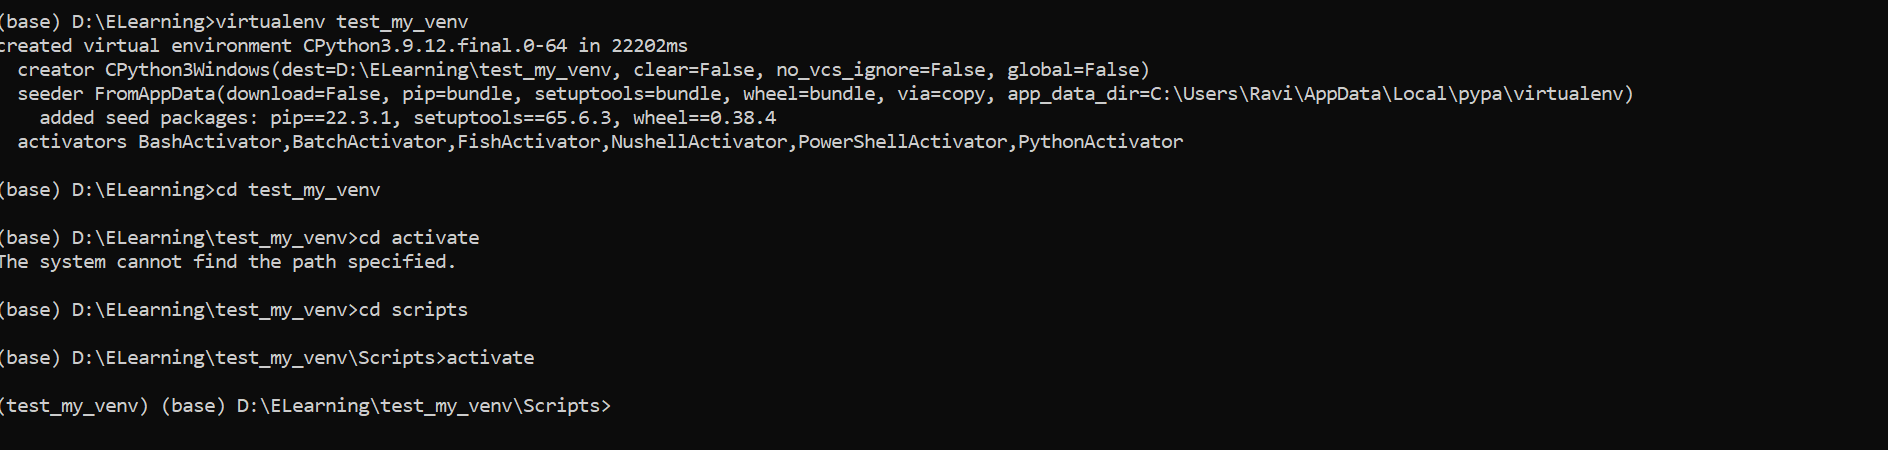

**pytest package installation and vsrion check**

pip install pytest

pytest --version

In [ ]:
pytest --version

NameError: ignored

In [ ]:
import pytest

# content of test_sample.py
def func(x):
    return x + 1


def test_answer():
    assert func(4) == 5

test_answer()

**Application Structure**

Inside Virtual environment directory newly added example and tests directories.

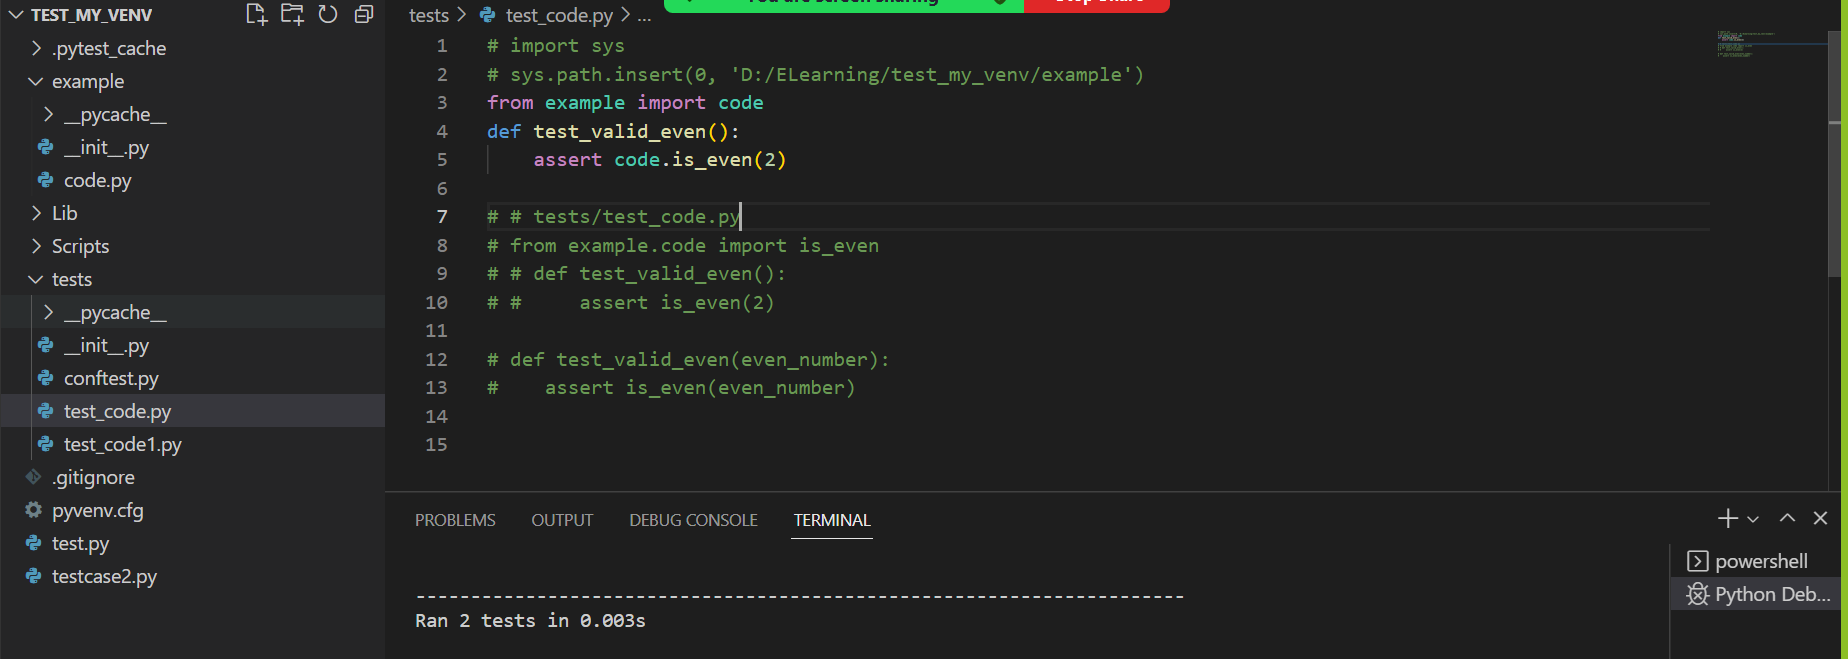

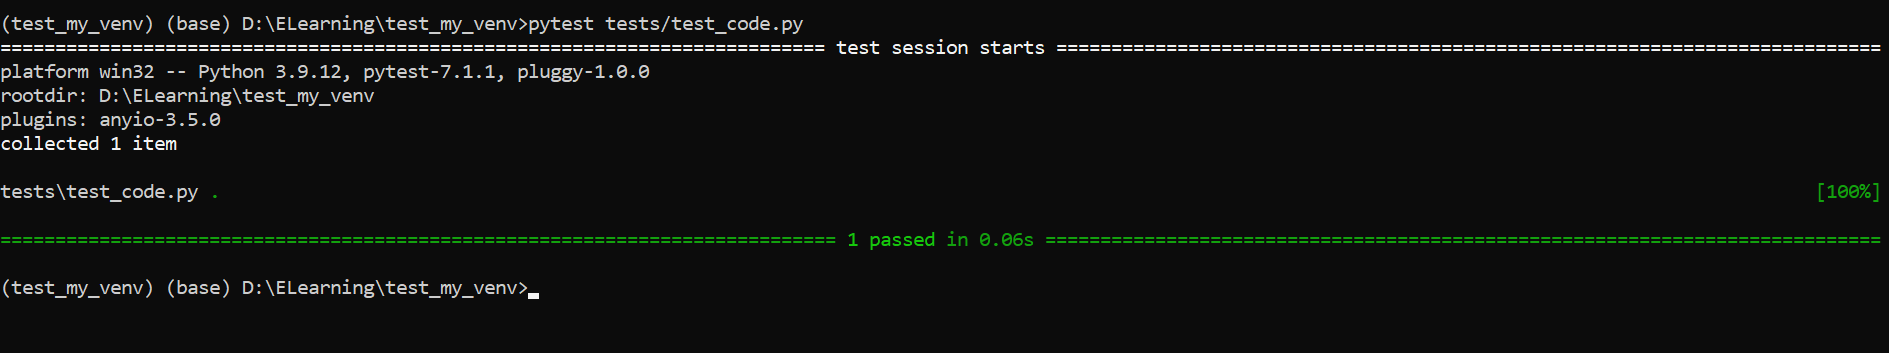

In [ ]:
#pytest testcases with single file

import pytest
def test_file1_method1():
	x=5
	y=6
	assert x+1 == y,"test failed"
	assert x == y,"test failed"

  
def test_file1_method2():
	x=5
	y=6
	assert x+1 == y,"test failed" 

test_file1_method1()
test_file1_method2()

AssertionError: ignored

**How PyTest Identifies the Test Files and Test Methods**

*   By default pytest only identifies the file names starting with test_ or ending with _test as the test files.

*   Pytest requires the test method names to start with “test.”

**Configuration files**

We can specify the initial configuration for pytest using a pytest.ini file.

**Pytest features**

*   Asserts
*   Fixtures
*   Markers

**Asserts**

In pytest the asserts are simple and self-explanatory. we use the assert keyword with some expression that must be valid. Otherwise, the test will fail. 

In [ ]:
def test_set_comparison():
  set1 = set("1308")
  set2 = set("8035")
  assert set1 == set2, 'Error'
test_set_comparison()

AssertionError: ignored

**Fixtures**

It is a prime example of dependency injection.

Fixtures allow test functions to easily receive and work against specific pre-initialized application objects without having to care about import/setup/cleanup details.

Fixtures are functions decorated with the pytest decorator @pytest.fixture.

pytest only detects modules according to the testpaths defined on your ini file.


In [ ]:
# tests/conftest.py
import pytest
@pytest.fixture
def even_number():
	return 2

In [ ]:
# tests/test_code.py
from example.code import is_even

def test_valid_even(even_number):
   assert is_even(even_number)

ModuleNotFoundError: ignored

**Pytest workflow:**

*   Find and read a configuration file.

*   Identify all declared fixtures on conftest.py files and collect them.

*   Collect all tests that match the specified directories and pattern on the ini file.

*   Before executing each test, pytest will check the test arguments to see if it matches any collected fixture. If it does, it will execute the fixture and use the returned value as the parameter with the fixture name


*   After all pytest executes all the fixtures and replaced their respective value, it will run the test.

**Scopes**

pytest executes all fixtures once per function. If a specific fixture need to run, we have to use the scope parameter.

The possible values of the scope parameter are: function, class, module, package or session.

In [ ]:
import pytest
import smtplib
@pytest.fixture(scope="module")
def smtp_connection():
   return smtplib.SMTP("smtp.gmail.com", 587, timeout=5)

@pytest.fixture(scope="module1")
def smtp_connection():
   return smtplib.SMTP("smtp.outlook.com", 587, timeout=5)

In [ ]:
# content of conftest.py
import smtplib
import pytest
@pytest.fixture(scope="module")
def smtp_connection():
   smtp_connection = smtplib.SMTP("smtp.gmail.com", 587, timeout=5)
   yield smtp_connection  # provide the fixture value
   print("teardown smtp")
   smtp_connection.close()


**Multiple conftest file:**

├── tests
│  ├── __init__.py
│  ├── test_example.py
│  ├── conftest.py
│  └── api
│     ├── __init__.py
│     ├── test_api.py
│        └── conftest.py


Tests defined in the test_example.py can use the fixtures defined in tests/conftest.py, but the test_api.py can use all fixtures from tests/conftest.py and tests/api/conftest.py.

**Markers**

Markers are a pytest decorator that allows us to classify our tests or perform some specific action.

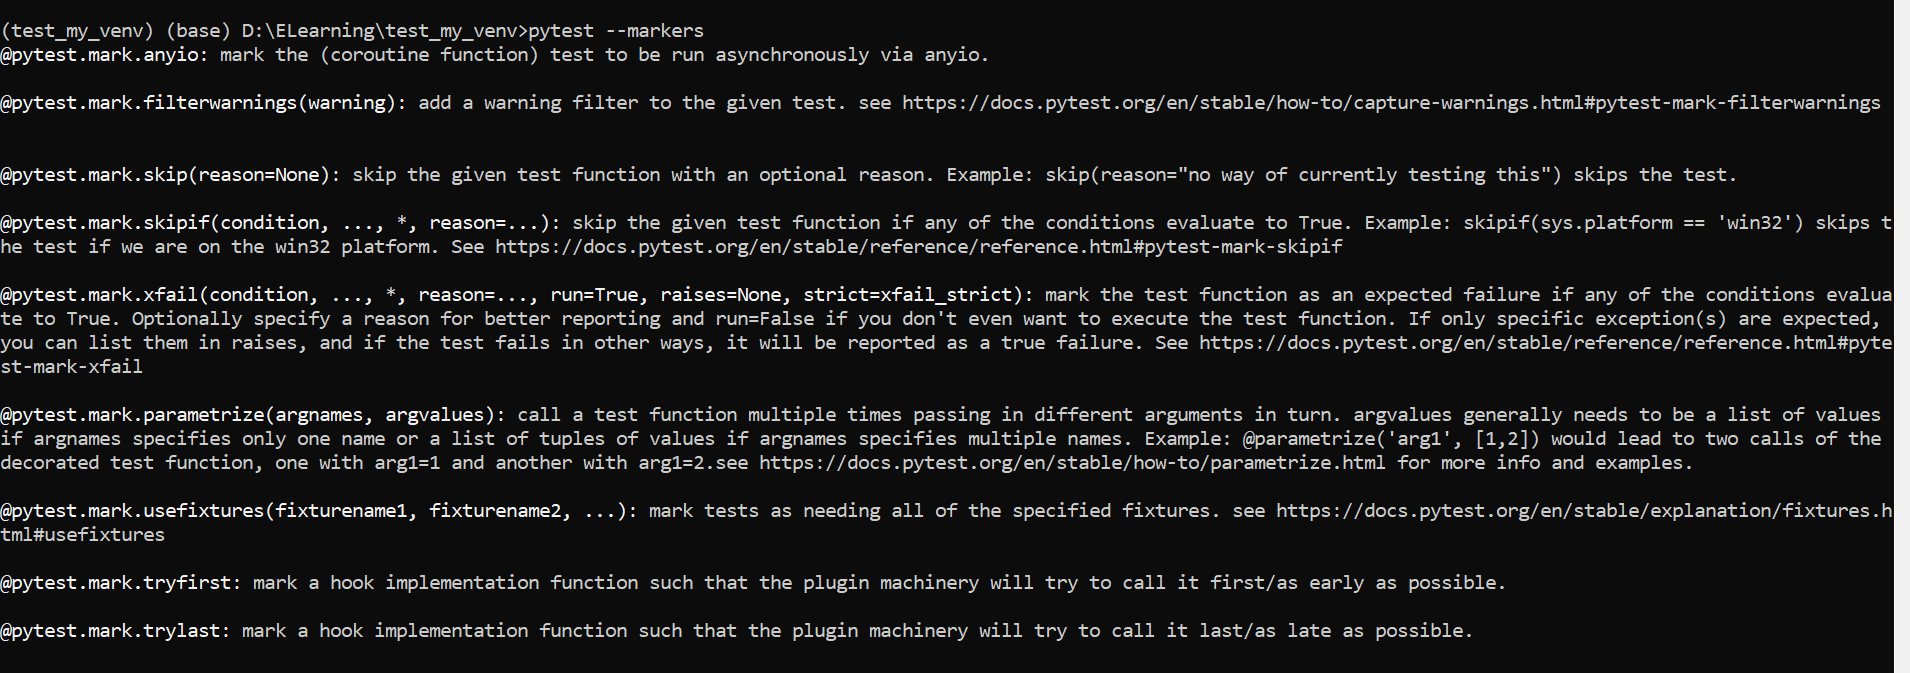

**Pytest Xfail / Skip Tests**

There will be some situations where we don’t want to execute a test, or a test case is not relevant for a particular time. In those situations, we have the option to Xfail the test or skip the tests


**@pytest.mark.xfail.**

The xfailed test will be executed, but it will not be counted as part failed or passed tests. There will be no traceback displayed if that test fails. We can xfail tests using


**@pytest.mark.skip.**

Skipping a test means that the test will not be executed. We can skip tests using





In [ ]:
@pytest.mark.skip(reason='This test is no longer required')
def test_valid_even(even_number):
    pass

In [ ]:
@pytest.mark.skip(reason=None)
def even_number():
	return 2

In [ ]:
condition = 0
@pytest.mark.xfail(condition, reason=None, run=True, raises=None, strict=False)
def even_number():
	return 2

In [ ]:

@pytest.mark.parametrize(argnames, argvalues)
def test():
    pass
#This marker will allow you to reuse a test with different parameters so you include more cases or situations as input for your test.

In [ ]:
@pytest.mark.parametrize("number", [2, 4, 6, 8])
def test_valid_even(number):
    assert is_even(number)

To get pytest ran summary: **pytest -ra**

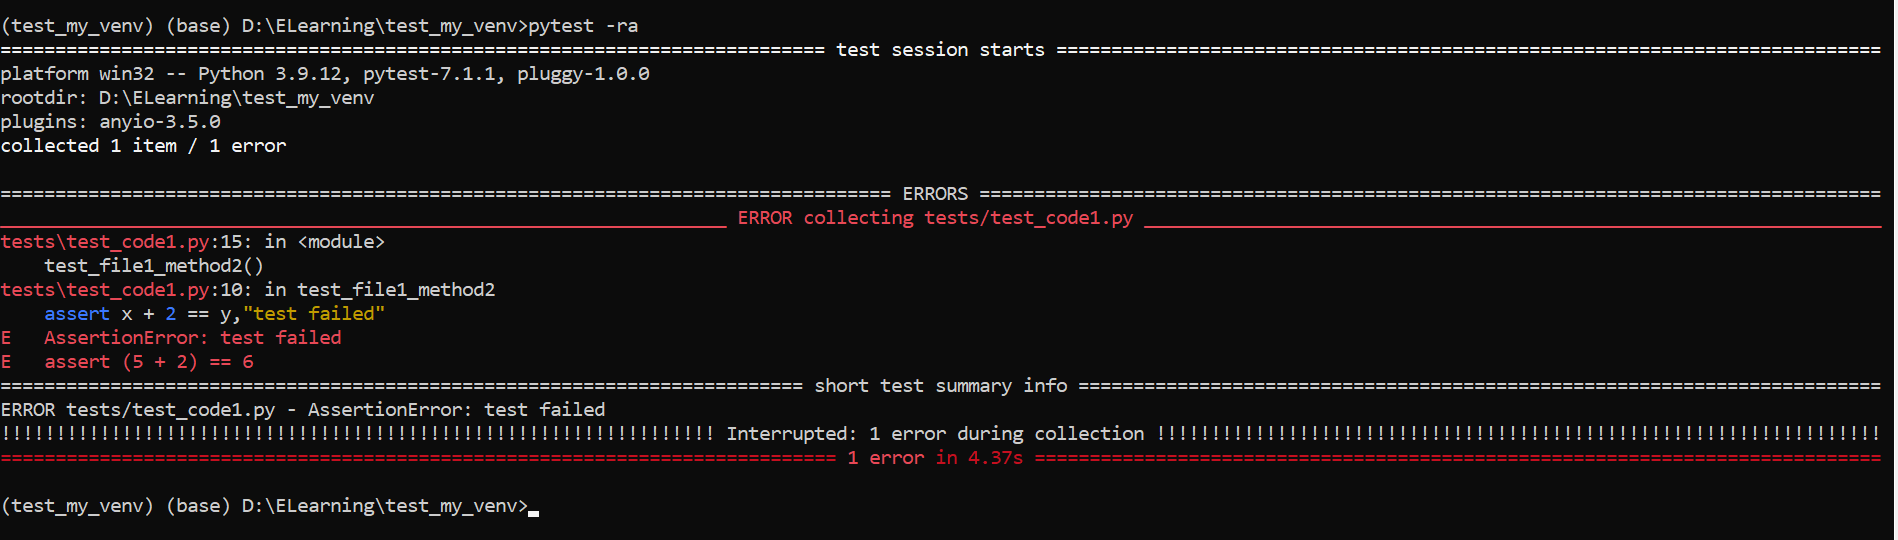

**Run tests by markers**

In [ ]:
#test_sample1.py

import pytest
@pytest.mark.set1
def test_method1():
	x=5
	y=6
	assert x+1 == y,"test failed"
	assert x == y,"test failed because x=" + str(x) + " y=" + str(y)

@pytest.mark.set2
def test_method2():
	x = 5
	y = 6
	assert x + 1 == y,"test failed"

In [ ]:
#test_sample2.py

import pytest
@pytest.mark.set1
def test_method3():
	x = 5
	y = 6
	assert x + 1 == y,"test failed"
	assert x == y,"test failed because x=" + str(x) + " y=" + str(y)

@pytest.mark.set1
def test_method4():
	x=5
	y=6
	assert x+1 == y,"test failed"

In [ ]:
#We can run the marked test by
pytest -m set1  

#will run the methods test_method1, test_method3, test_method4.

pytest -m set2

#will run pytest -m set2 will run test_method2.

**Run Tests in Parallel using Pytest**

In [ ]:
pip install pytest-xdist

In [ ]:
pytest -n 3

**Example of test repository structure.**

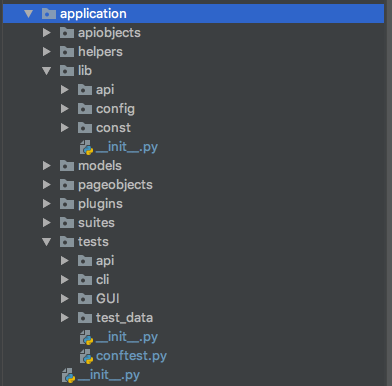

**apiobjects:** Good place for creating wrappers for invoking API end-points. You can have a BaseAPIObject and a derived class to match your requirements.

**helpers:** Write your helper methods.

**lib:** Library files, which can be used by different components e.g. your fixtures in conftest, pageobjects etc.

**pageobjects:** PageObjects design pattern can be used for creating your classes of different GUI pages. We at tenable use Webium , which is a Page Object pattern implementation library for Python.

**suites:** You can write your pylint code verification suites here, it would be helpful to get confidence on your code quality.

**tests:** You can have categorized test directories based on the flavor of your tests. It makes it easy to manage and explore your tests.